In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [7]:
# Assuming 'Survey.csv' is your data file path
file_path = r"C:\Users\LENOVO\Downloads\Survey.csv"

In [8]:
# Read CSV data into a DataFrame
survey_df = pd.read_csv(file_path)


In [9]:
# Subset the data for analysis (adjust column indices as per your data)
sur_int = survey_df.iloc[:, 19:45]  # Select columns 20 to 46, adjust indices as needed


In [10]:
# Check for missing values
print(sur_int.isnull().sum())

3. Proximity to transport                    0
4. Proximity to work place                   0
5. Proximity to shopping                     0
1. Gym/Pool/Sports facility                  0
2. Parking space                             0
3.Power back-up                              0
4.Water supply                               0
5.Security                                   0
1. Exterior look                             0
2. Unit size                                 0
3. Interior design and branded components    0
4. Layout plan (Integrated etc.)             0
5. View from apartment                       0
1. Price                                     0
2. Booking amount                            0
3. Equated Monthly Instalment (EMI)          0
4. Maintenance charges                       0
5. Availability of loan                      0
1. Builder reputation                        0
2. Appreciation potential                    0
3. Profile of neighbourhood                  0
4. Availabili

In [11]:
# Replace missing values with column means
sur_int.fillna(sur_int.mean(), inplace=True)

In [12]:
# Standardize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [13]:
# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int_scaled)


In [14]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_


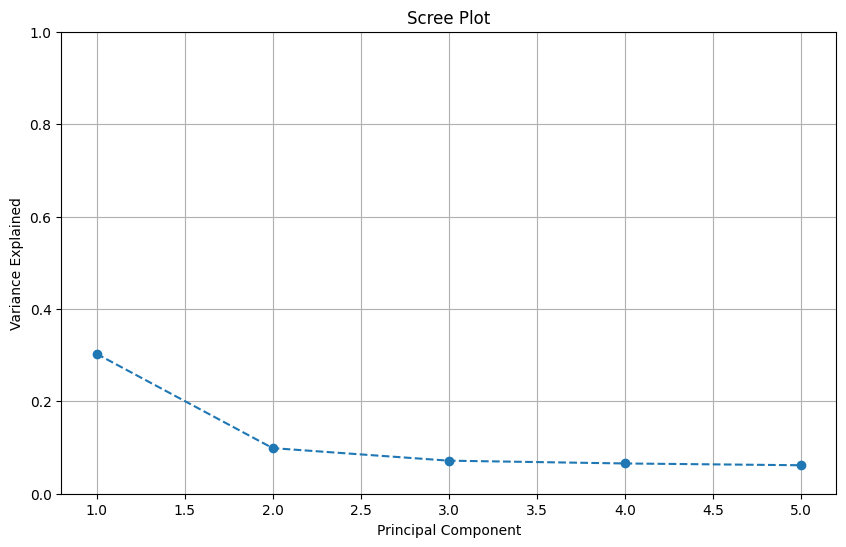

In [15]:
# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [16]:
# Biplot (if needed)
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df['Cluster'] = survey_df['Cluster']  # Assuming 'Cluster' is a column in your DataFrame
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', legend='full')
plt.title('PCA Biplot')
plt.show()

KeyError: 'Cluster'

In [ ]:
# Print principal components and their variance explained
print("Principal Components:\n", pca.components_)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)